In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
import re

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
reddit_sentiment_data = pd.read_csv('/content/Reddit_Data.csv')

In [6]:
reddit_sentiment_data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [9]:
## checking the category
reddit_sentiment_data['category'].value_counts(normalize=True)

,proportion
category,
1,0.424978
0,0.352815
-1,0.222207


In [ ]:
## 0 Indicating it is a Neutral Tweet/Comment
## 1 Indicating a Postive Sentiment
## -1 Indicating a Negative Tweet/Comment

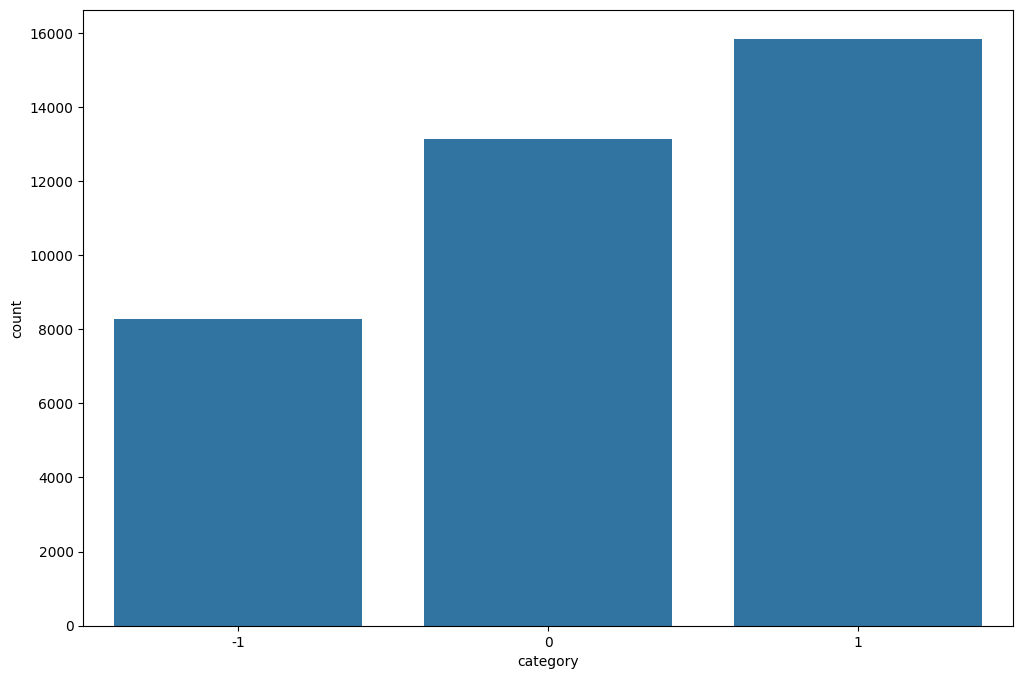

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(data=reddit_sentiment_data, x='category')
plt.show()

In [18]:
stw = stopwords.words('english')
stw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
lemmat = WordNetLemmatizer().lemmatize

In [33]:
reddit_sentiment_data['clean_comment'] =reddit_sentiment_data['clean_comment'].astype(str)

In [34]:
## cleaning up the texts/ tweets by removing the unwanted characters
def clean_tweets(text):
  txt = text.lower()
  pattrn = r'[^a-zA-Z]+'
  txt = re.sub(pattrn, ' ', txt)
  txt = [lemmat(word)for word in word_tokenize(txt) if word not in stw ]
  txt = ' '.join(txt)
  return txt

In [35]:
reddit_sentiment_data['clan_lemmatized_tweet'] = reddit_sentiment_data['clean_comment'].apply(clean_tweets)

In [36]:
reddit_sentiment_data.head()

,clean_comment,category,clan_lemmatized_tweet
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...


In [43]:
## lets check the most repeated words in the whole comments
cv = CountVectorizer()
vect_words = cv.fit_transform(reddit_sentiment_data['clan_lemmatized_tweet'])
vect_words

sum_words = vect_words.sum(axis=0)
sum_words

words_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
words_freq_df = pd.DataFrame(words_freq, columns=['words', 'freq'])
words_freq_df.head()

,words,freq
0,people,5582
1,india,5314
2,like,5140
3,bjp,5091
4,modi,5022


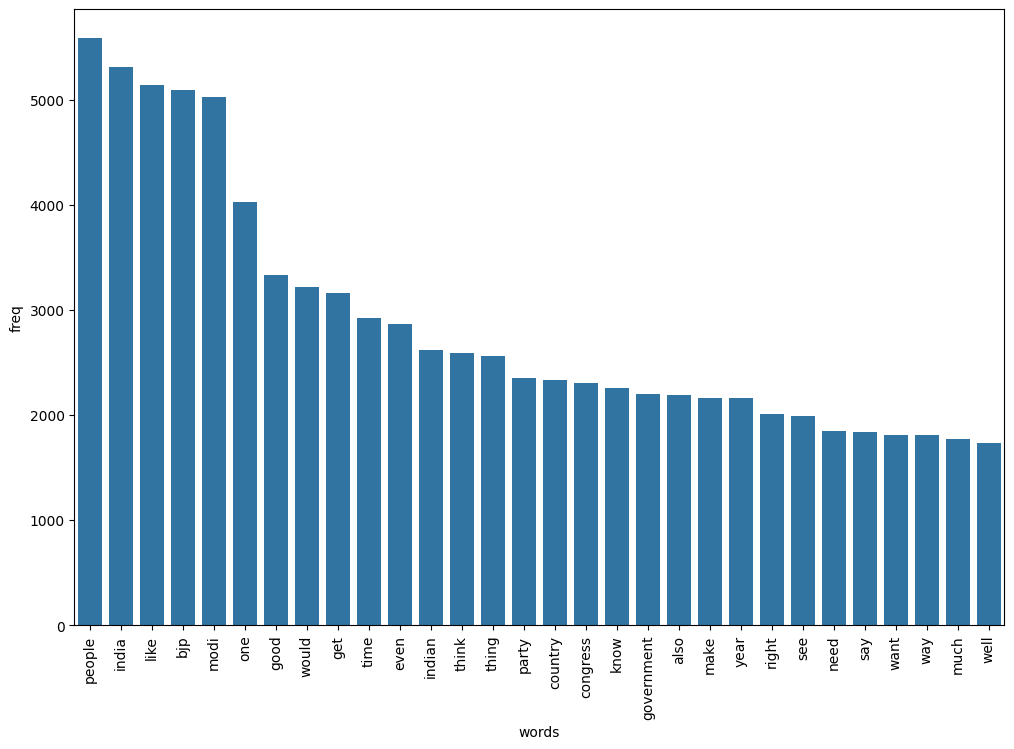

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(data=words_freq_df[0:30:], x='words', y='freq')
plt.xticks(rotation=90)
plt.show()

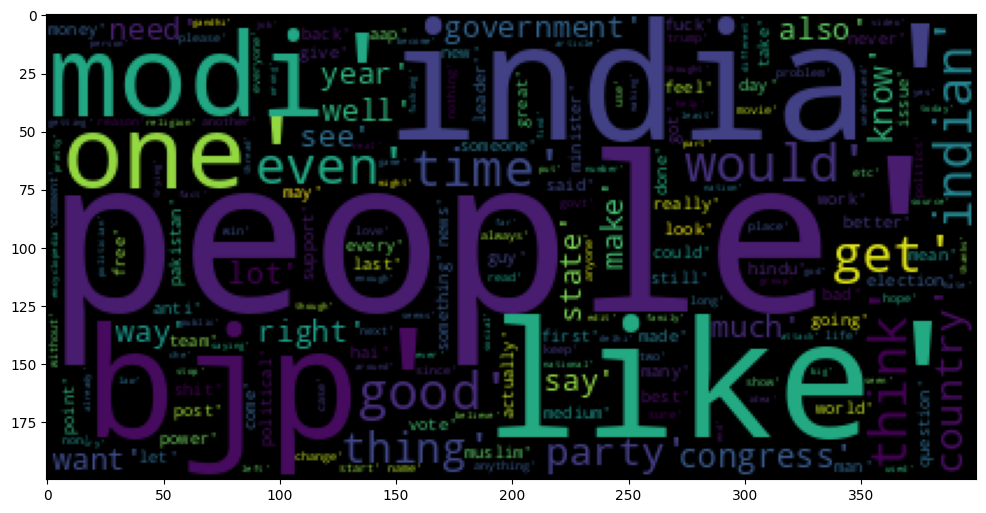

In [52]:
from wordcloud import WordCloud
words = dict(zip(words_freq_df['words'], words_freq_df['freq']))
plt.figure(figsize=(12,8))
wc = WordCloud().generate(str(words))
plt.imshow(wc)
plt.show()

In [61]:
##checking the ngrams
def n_grams(n_gram_min_range, n_gram_max_range):
  cv = CountVectorizer(ngram_range=(n_gram_min_range,n_gram_max_range))
  vect_word = cv.fit_transform(reddit_sentiment_data['clan_lemmatized_tweet'])
  sum_words = vect_word.sum(axis=0)
  words_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
  words_freq_df = pd.DataFrame(words_freq, columns=['words', 'freq'])
  return words_freq_df


In [62]:
unigram = n_grams(1,1)
unigram.head()

,words,freq
0,people,5582
1,india,5314
2,like,5140
3,bjp,5091
4,modi,5022


In [63]:
bigram = n_grams(2,2)
bigram.head()

,words,freq
0,free encyclopedia,623
1,encyclopedia team,598
2,look like,417
3,prime minister,395
4,best overall,375


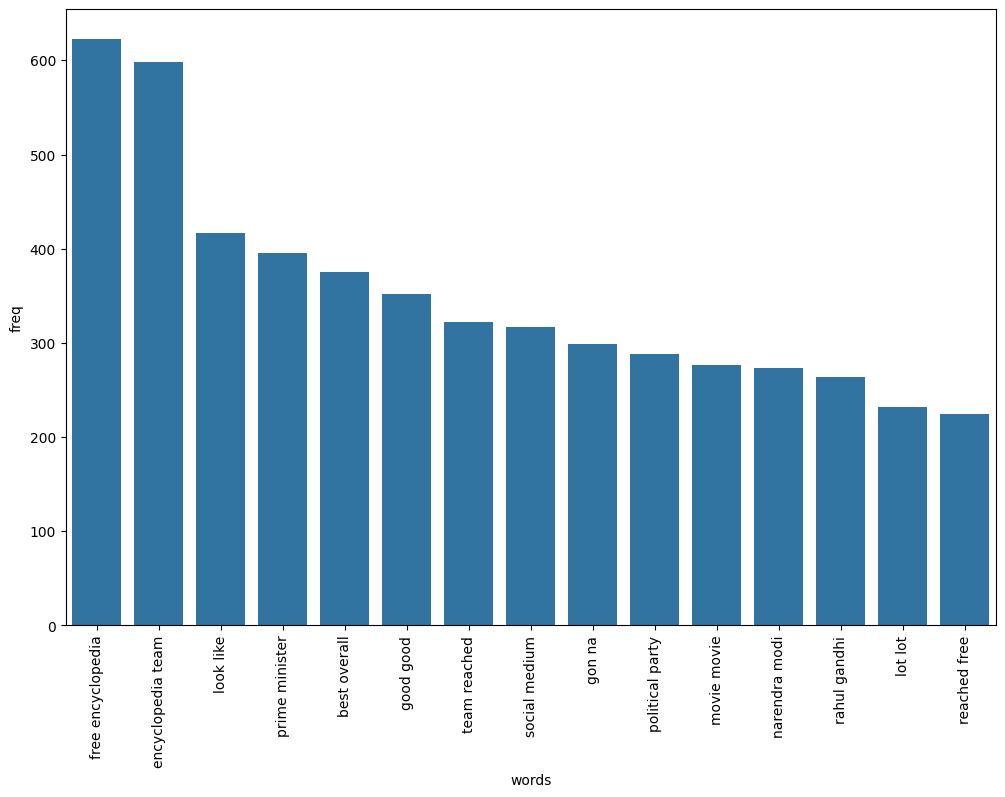

In [67]:
##plotting top 15 bigram words
plt.figure(figsize=(12,8))
sns.barplot(data=bigram[0:15], x='words', y='freq')
plt.xticks(rotation=90)
plt.show()

In [64]:
trigram = n_grams(3,3)
trigram.head()

,words,freq
0,free encyclopedia team,598
1,good good good,333
2,encyclopedia team reached,316
3,movie movie movie,266
4,team reached free,224


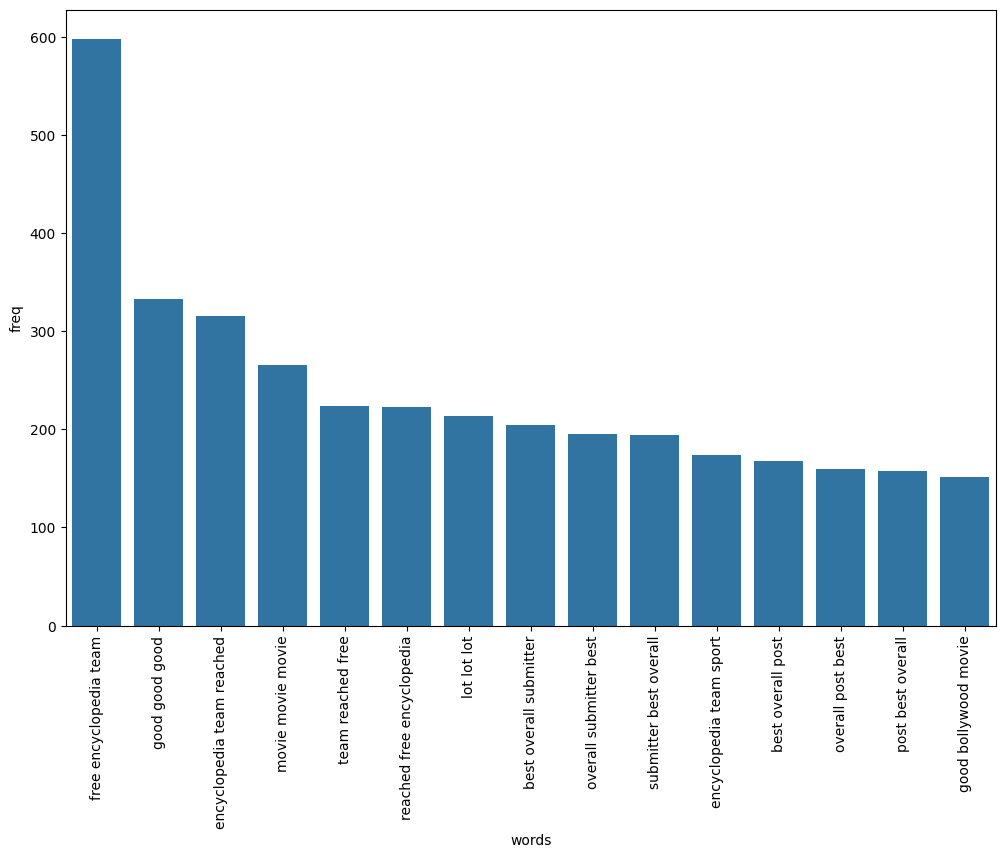

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(data=trigram[0:15], x='words', y='freq')
plt.xticks(rotation=90)
plt.show()

In [97]:
x=reddit_sentiment_data['clan_lemmatized_tweet']
y=reddit_sentiment_data['category']

In [98]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify=reddit_sentiment_data['category'], random_state=42)

In [99]:
### Converting the words into meaningful vectors using TFIDF VECTORIZER
tf_idf = TfidfVectorizer()
tfifd_train_vect = tf_idf.fit_transform(x_train).toarray()
tfidf_test_vect = tf_idf.transform(x_test).toarray()

In [100]:
tfifd_train_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
###
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [102]:
Naive_bayes_mod = MultinomialNB()
multi_naives = Naive_bayes_mod.fit(tfifd_train_vect, y_train)
multi_naives

MultinomialNB()

In [103]:
## predicting
y_train_pred = multi_naives.predict(tfifd_train_vect)
y_test_pred = multi_naives.predict(tfidf_test_vect)

In [104]:
##evaluate
acs_train = accuracy_score(y_train, y_train_pred)
acs_train

0.638477801268499

In [110]:
acs_train = accuracy_score(y_train, y_train_pred)
acs_train

0.638477801268499

In [111]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

          -1       0.99      0.19      0.32      6622
           0       0.93      0.51      0.66     10513
           1       0.55      0.98      0.70     12664

    accuracy                           0.64     29799
   macro avg       0.82      0.56      0.56     29799
weighted avg       0.78      0.64      0.60     29799



In [106]:
##confusion matrix display
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          -1       0.91      0.09      0.17      1655
           0       0.89      0.33      0.48      2629
           1       0.49      0.98      0.65      3166

    accuracy                           0.55      7450
   macro avg       0.76      0.47      0.43      7450
weighted avg       0.72      0.55      0.48      7450



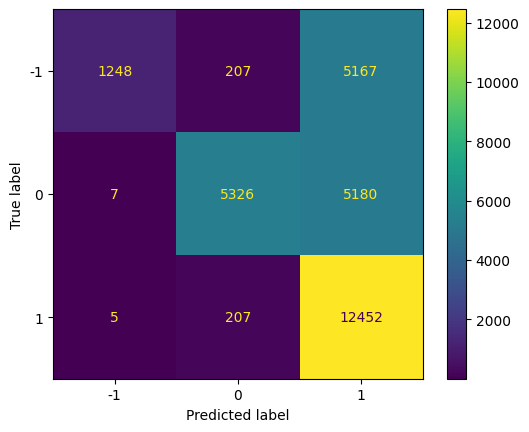

In [113]:
cmd = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cmd

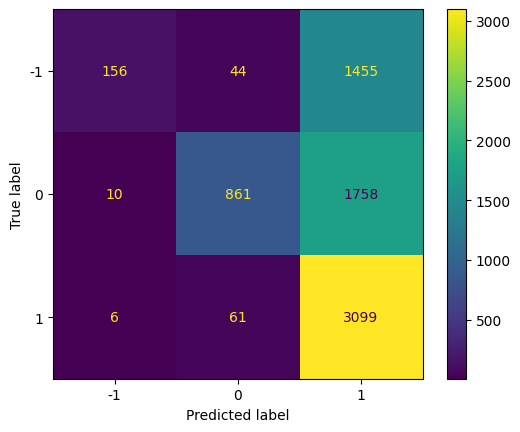

In [114]:
cmd_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cmd_test